In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import rep_eddy_delta
import random

random.seed(1234)

In [3]:
volume_corner1 = [-1,0,-3]
volume_corner2 = [15,3,3]

In [4]:
Ux = np.zeros(int(((volume_corner2[0]-volume_corner1[0])/0.05)*((volume_corner2[1]-volume_corner1[1])/0.05)))
Uy = np.zeros(int(((volume_corner2[0]-volume_corner1[0])/0.05)*((volume_corner2[1]-volume_corner1[1])/0.05)))
Uz = np.zeros(int(((volume_corner2[0]-volume_corner1[0])/0.05)*((volume_corner2[1]-volume_corner1[1])/0.05)))

for hire in range(4):
    h = 0.5*(hire+1)
    for _ in range(3*(4-hire)):
        locx = random.uniform(volume_corner1[0],volume_corner2[0])
        locz = random.uniform(volume_corner1[2],volume_corner2[2])
        eddy = rep_eddy_delta.Rep_eddy(h,100,locx,locz,volume_corner1,volume_corner2)
        Ux += eddy.Ux
        Uy += eddy.Uy
        Uz += eddy.Uz    

/home/pnakhate/AEM/rep_eddy_delta.py:55: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  points = np.vstack(map(np.ravel, grid)).T


In [5]:
plt.hist(Ux,450,alpha=0.4,color='red')
plt.xlim([-0.0002,0.0002])
plt.show()

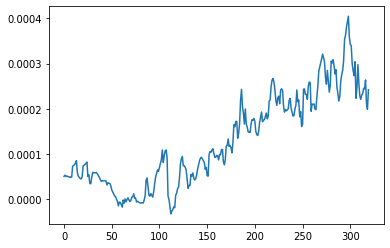

In [69]:
temp = int(((volume_corner2[1]-volume_corner1[1])/0.05))
Umean = np.zeros(int(Ux.shape[0]/temp))
Ux[np.isnan(Ux)] = 0
for i in range(int(Ux.shape[0]/temp)):
    for j in range(temp):
        Umean[i] += Ux[temp*i+j]
    Umean[i] = Umean[i]/temp
plt.plot(Umean)

In [ ]:
grid = np.mgrid[volume_corner1[0]:volume_corner2[0]:0.05, volume_corner1[1]:volume_corner2[1]:0.05]

# create list of grid points
points = np.vstack(map(np.ravel, grid)).T
points = np.hstack([points, np.zeros([len(points),1])])

fig = plt.figure(dpi=1200)
ax = fig.gca()
ax.quiver(points[:, 0], points[:, 1], Ux, Uy)
X = np.unique(points[:, 0])
Y = np.unique(points[:, 1])
plt.show()

/tmp/ipykernel_38233/1090180988.py:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  points = np.vstack(map(np.ravel, grid)).T
